In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Handle Zero values:

There are zero values in columns like BMI,Blood pressure, Insulin and SkinThickness. Now it is physically impossible for this features to have a zero value. Hence, all 0 can be replaced with the mean values of respective columns

In [5]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

#### EDA

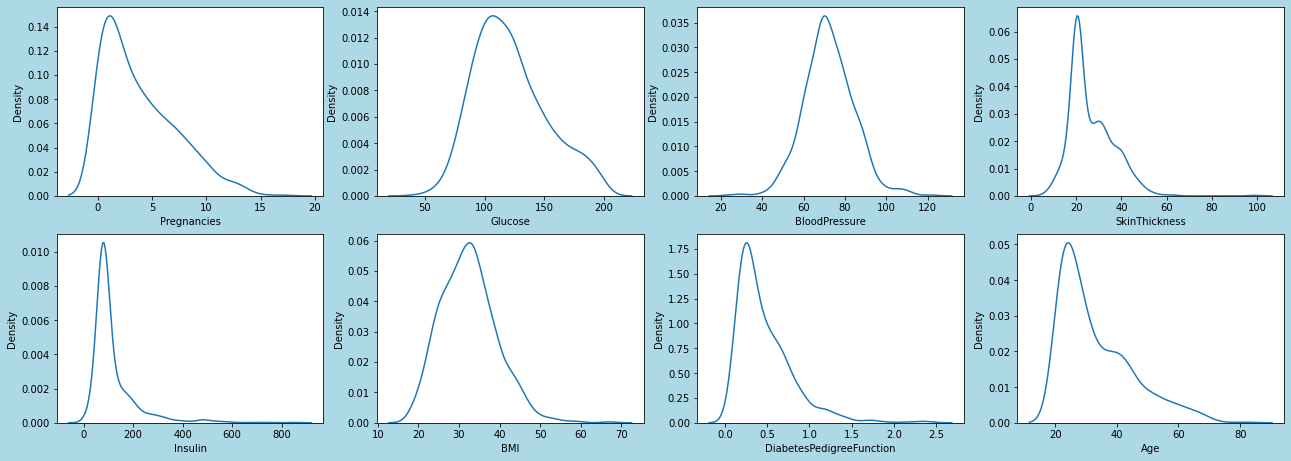

In [6]:
plt.figure(figsize=(22,16),facecolor='lightblue')
# plt.suptitle('Boxplot for all the columns')
cols = data.columns
for i in range(0,len(data.columns)-1):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data[cols[i]])
    plt.xlabel(cols[i])

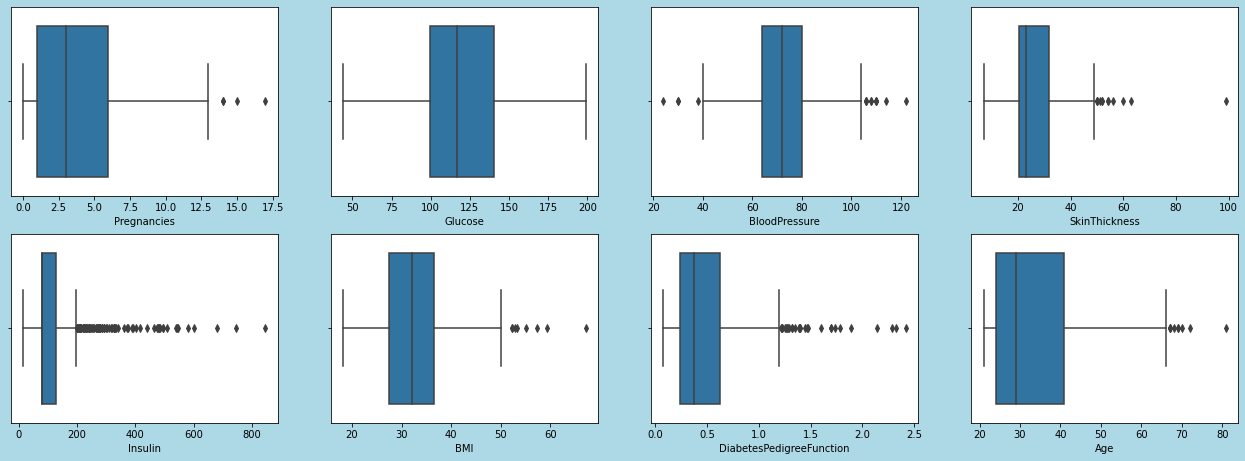

In [7]:
plt.figure(figsize=(22,16),facecolor='lightblue')
# plt.suptitle('Boxplot for all the columns')
cols = data.columns
for i in range(0,len(data.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(data[cols[i]])
    plt.xlabel(cols[i])

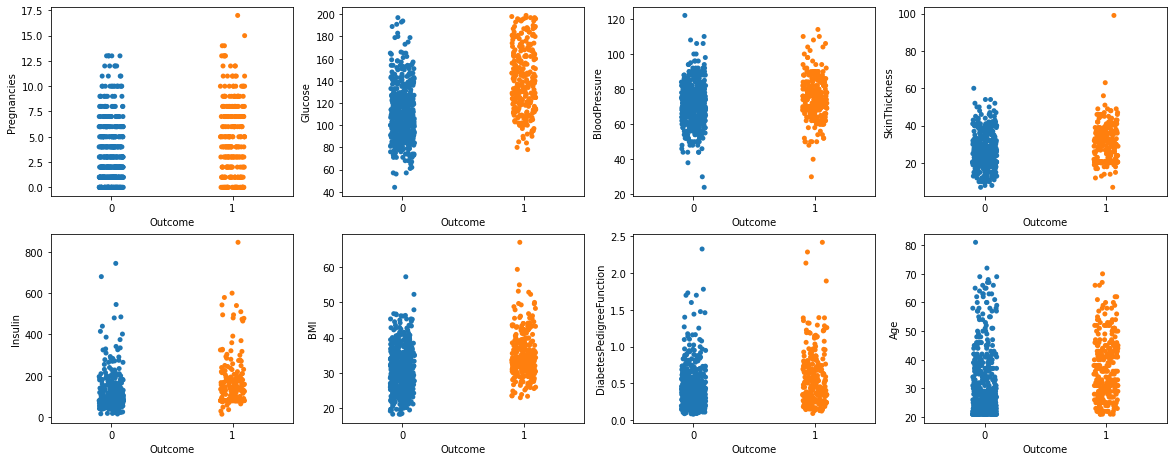

In [8]:
plt.figure(figsize=(20,16),facecolor='white')
# plt.suptitle('Boxplot for all the columns')
cols = data.columns
for i in range(0,len(data.columns)-1):
    plt.subplot(4,4,i+1)
    sns.stripplot(data.Outcome,data[cols[i]])
    plt.xlabel('Outcome')

<AxesSubplot:>

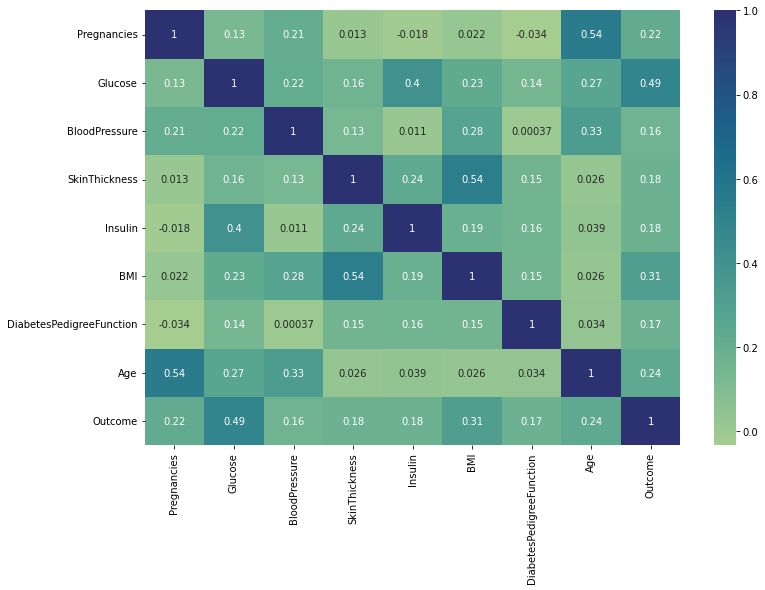

In [9]:
plt.figure(figsize=(12,8),facecolor='White')
sns.heatmap(data.corr(), annot=True,cmap='crest')